In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [54]:
df = pd.read_csv('knn_sonar.csv')

INITIAL EDA

In [55]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [56]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [58]:
df["Label"].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

Data Clean Up And Preparations

In [59]:
df["Label"] = df["Label"].map({"M": 1, "R": 0})
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [60]:
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [61]:
K = 9
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
prediction = knn.predict(X_test)

In [63]:
prediction

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [64]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[17 11]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.72      0.83      0.77        35

    accuracy                           0.73        63
   macro avg       0.73      0.72      0.72        63
weighted avg       0.73      0.73      0.73        63



In [65]:
error_rates = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

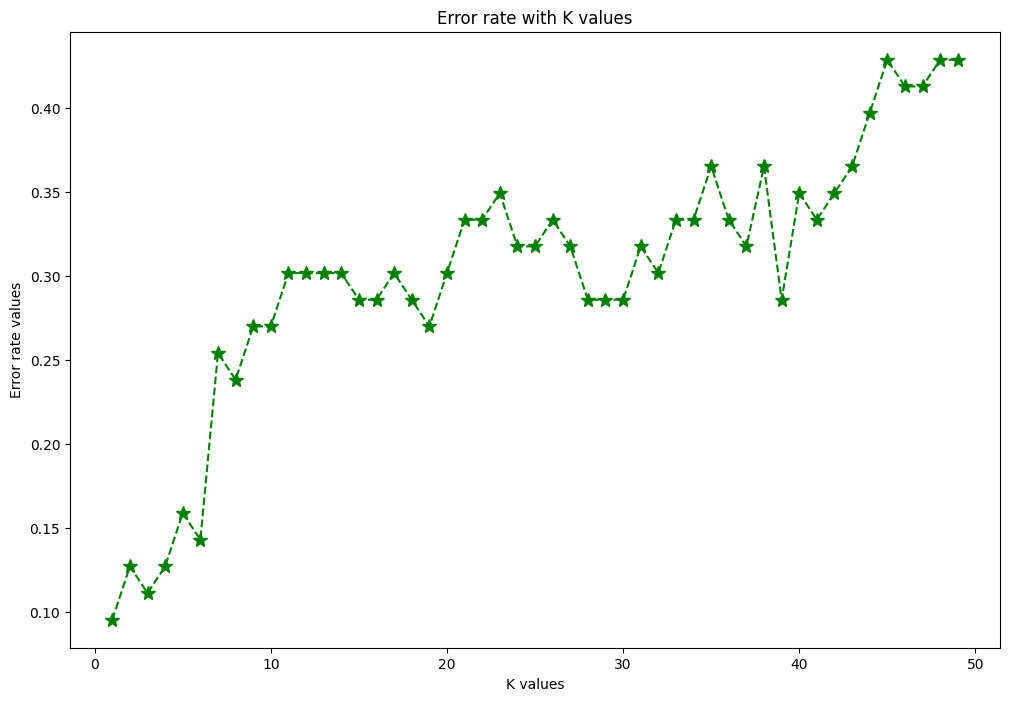

In [66]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [67]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[24  4]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.92        35

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



STANDARDIZE DATA

In [68]:
data = df.drop(["Label"],axis=1).values
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standard_data = (data - mean) / std_dev

standard_df = pd.DataFrame(standard_data, columns=df.drop(["Label"], axis = 1).columns)

In [69]:
standard_df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [70]:
scaler = StandardScaler()
scaler.fit(df.drop('Label',axis=1))

StandardScaler()

In [71]:
sk_features_scaled = scaler.transform(df.drop("Label",axis=1))

In [72]:
sk_features_scaled

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [73]:
df_features_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[:-1])

In [74]:
df_features_scaled.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [75]:
X = df_features_scaled
y = df['Label']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [77]:
K = 9
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[19  9]
 [ 4 31]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.78      0.89      0.83        35

    accuracy                           0.79        63
   macro avg       0.80      0.78      0.79        63
weighted avg       0.80      0.79      0.79        63



In [78]:
error_rates = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

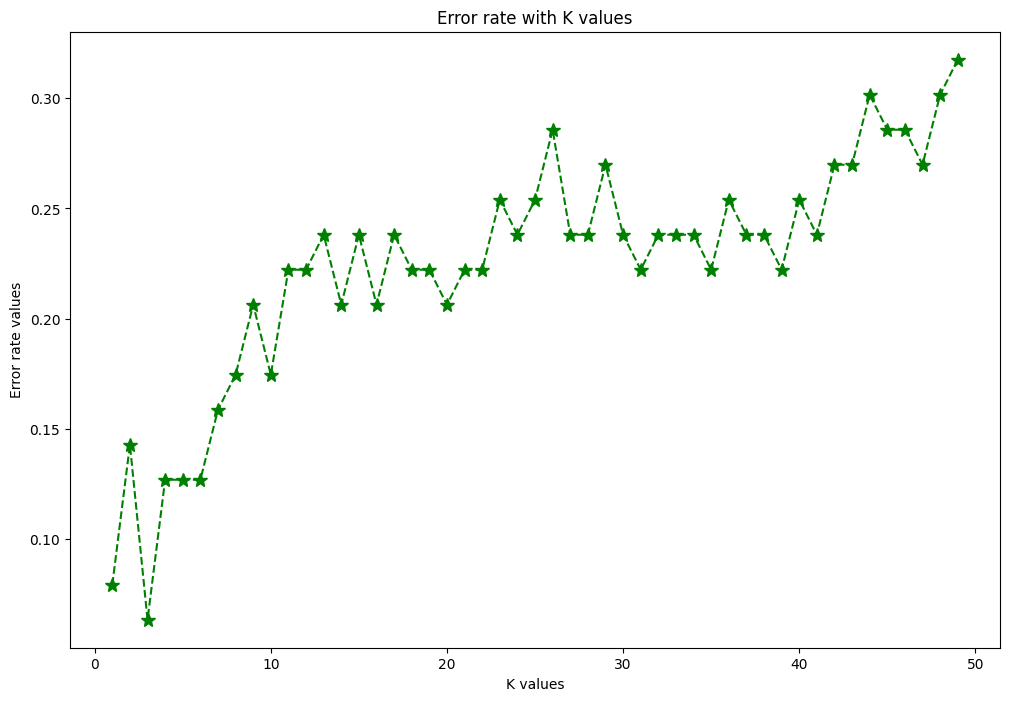

In [79]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [80]:
K = 3
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[26  2]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.94      0.94      0.94        35

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

